# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №4 (опциональное)
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы вкратце пройдете цикл решения задачи анализа данных от первичного знакомства с данными до некоторого приемлемого качества решения задачи. Девиз задания - все интерпретируемо! Мы будем визуализировать результаты работы всех используемых методов из sklearn, чтобы понять, как они работают с нашими данными. Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

**Срок сдачи:** 17 июня 2017, 23:59

При отправлении ДЗ на почту `hse.minor.dm+X@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:
** [ИАД-X] Фамилия Имя ДЗ-4 **

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [24]:
DATA_DIR = os.path.join('/Users/alena/Downloads/')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [25]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [26]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [27]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [29]:
X = np.array(table_data.iloc[:, 2:])

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(table_data.species)

In [30]:
sss = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 12345)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_idx, test_idx = train_index, test_index

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [31]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

(357, 700)


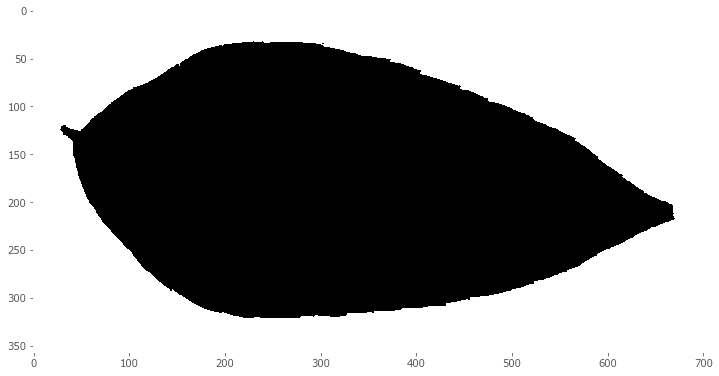

In [32]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции scipy.misc.imresiz:

In [33]:
from scipy.misc import imresize

In [34]:
img_resized = imresize(img, (100, 100))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


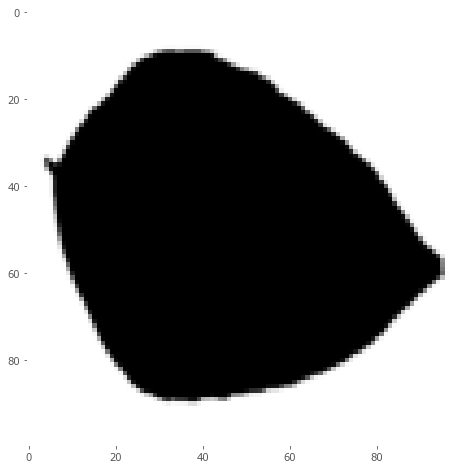

In [35]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [36]:
table_pics_ids = []
unique_pics_ids = []
id_ind = {}

for pic_id in table_data.id:
    filename = str(pic_id) + '.jpg'
    table_pics_ids.append(filename)
    
    index = table_data[table_data['id'] == pic_id].index.tolist()[0]
    id_ind[filename] = index
    
for elem in table_data.species.unique():
    mini_frame = table_data[table_data['species'] == elem]
    pic_id = mini_frame.id.iloc[2]
    
    filename = str(pic_id) + '.jpg'
    unique_pics_ids.append(filename)

In [37]:
leafs = os.listdir(IMG_DIR)

dict_train = {}
dict_test = {}
unique_pics = []

for picture in leafs:
    filepath = os.path.join(IMG_DIR, picture)
    
    img = plt.imread(filepath)
    img_resized = imresize(img, (100, 100))
    
    leaf = np.ravel(img_resized)
    
    if picture in id_ind.keys():
        if id_ind[picture] in train_idx:
            dict_train[id_ind[picture]] = leaf
        if id_ind[picture] in test_idx:
            dict_test[id_ind[picture]] = leaf
        if picture in unique_pics_ids:
            unique_pics.append(img_resized)      

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [38]:
imgs_train = []
imgs_test = []

for i in train_idx:
    leaf = dict_train[i]
    imgs_train.append(leaf)
    
for i in test_idx:
    leaf = dict_test[i]
    imgs_test.append(leaf)

imgs_train = np.array(imgs_train) 
imgs_test = np.array(imgs_test) 

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

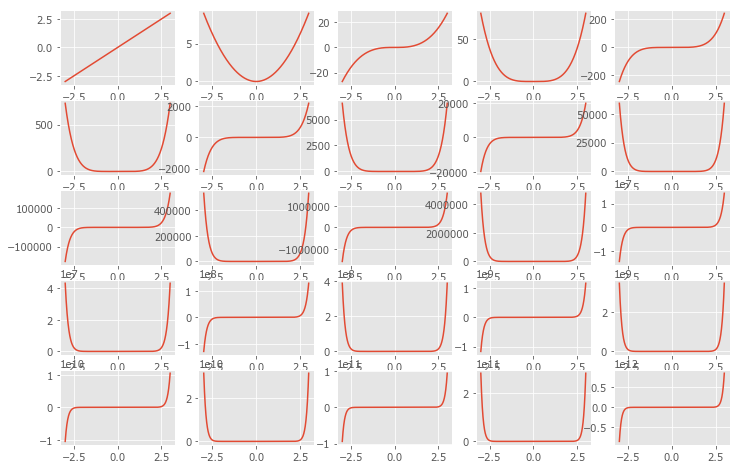

In [39]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

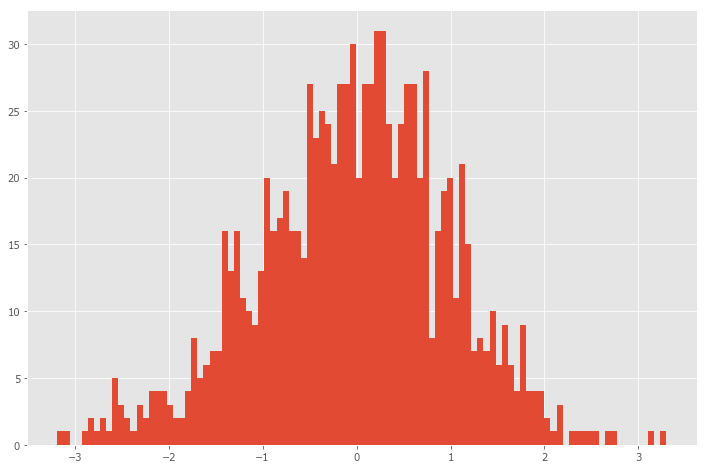

In [40]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (0.5 балла код + 0.5 балла выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

In [46]:
def draw_one_pic(array):
    pic = np.reshape(array, (100, 100))
    plt.imshow(pic, cmap='Greys')
    plt.grid(None)

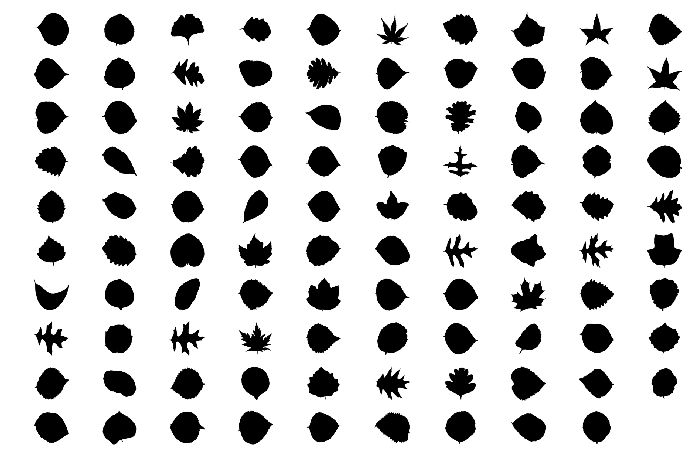

In [47]:
xs = np.linspace(-20, 20, 1000)

for i in range(1, 100):
    plt.subplot(10, 10, i)
    plt.imshow(unique_pics[i-1], cmap='Greys')
    plt.axis("off")
    plt.grid(None)

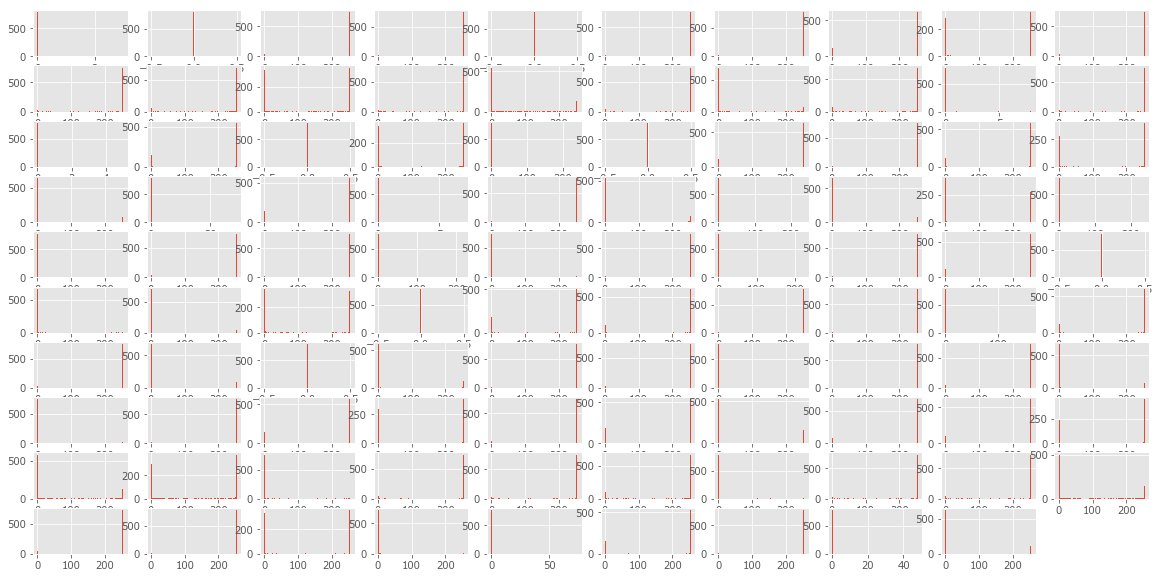

In [49]:
pix_ids = [random.randint(0, 9999) for i in range (100)]

plt.figure(figsize=(20, 10))

for i in range(1, 100):
    plt.subplot(10, 10, i)
    num = pix_ids[i-1]
    sample = imgs_train[:, num]
    plt.hist(sample, bins = 99)

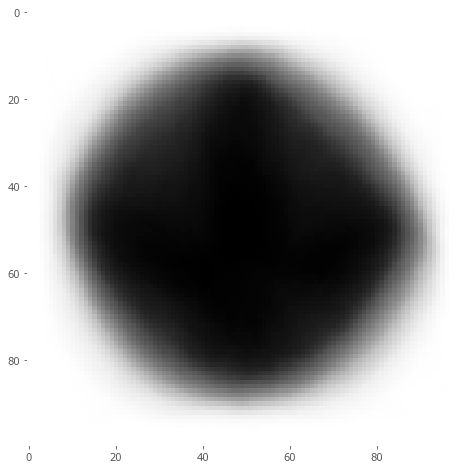

In [50]:
common_leaf = []

for i in range (10000):
    new_px = imgs_train[:, i].mean()
    common_leaf.append(new_px)
    
draw_one_pic(np.array(common_leaf))

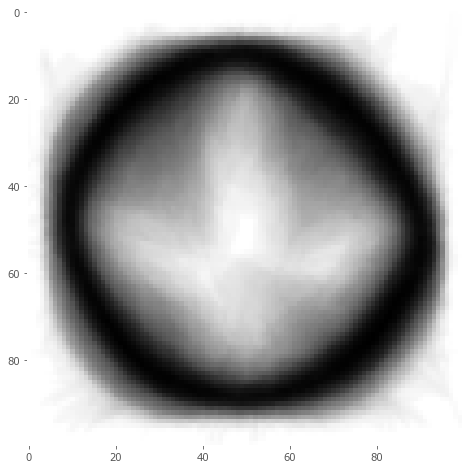

In [55]:
std_leaf = []

for i in range (10000):
    new_px = imgs_train[:, i].std()
    std_leaf.append(new_px)
    
draw_one_pic(np.array(std_leaf))

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

In [53]:
print(np.amax(imgs_train), np.amin(imgs_train))

255 0


Ответ: 
* Листья разных классов можно отличить визуально. Можно выделить классы листьев по породе дерева (например, дубовые), также можно выделить по форме листа(состоящие из нескольких листовых пластин, округлые). Но есть и очень похожие листья
* Значение признаков: 0 - минимальное, 255 - максимальное. Множество значений от 0 до 255. Чаще всего признаки принимают значения 0 - черный цвет и 255 - белый цвет. Похожи распределения тех пикселей, которые отражают черный цвет (и находятся по краям изображений), а распределения пикселей, находящихся в центре изображений, не похожи (т.к. у листов разные формы)
* Можно бинаризовать, т.к. в исходных изображениях используются только черный, белый и серый цвета, при этом серого немного, судя по гистограмме, сильной потери информации не будет. Для наилучший бинаризации подойдет бинаризация по максимальному элементу. То есть, черный кодируется единицей, а все что меньше кодируется нулем
* Средний лист похож на обычный, но в нем встречаются контуры других листьев. Он похож на обычный лист, потому что среди листов, много округлой формы. По гистограмме можно сказать, что много признаков принимают одно и то же значение 

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Запустите t-SNE на обучающей выборке (если долго считается, берите меньше объектов) и визуализируйте с цветовым указанием классов. Выведите легенду цветов.
* Затем повторите предыдущий шаг с треми различными параметрами [расстояния Минковского](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html): p=2 (это евклидово расстояние, оно установлено по умолчанию), p=1 и p=np.infty. 

In [63]:
def draw_scatter_plot(points):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c = points[:, 0])
    plt.colorbar()

In [64]:
def draw_minkowski(imgs_train, num):
    distance_matrix = []

    for i in range (792):
        i_matrix = []
        for j in range (792):
            i_distance = scipy.spatial.distance.minkowski(imgs_train[i, :], imgs_train[j, :], p = num)
            i_matrix.append(i_distance)
        distance_matrix.append(i_matrix)
        
    distance_matrix = np.array(distance_matrix)
    
    tsne = TSNE(random_state = 12345)
    points = tsne.fit_transform(distance_matrix)
    
    draw_scatter_plot(points)

Text(0.5,1,'TSNE euclidean')

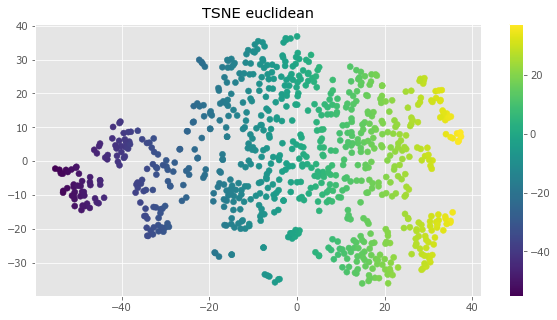

In [66]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 12345)
points = tsne.fit_transform(imgs_train)

draw_scatter_plot(points)
plt.title("TSNE euclidean")

Text(0.5,1,'TSNE minkowski, p=2')

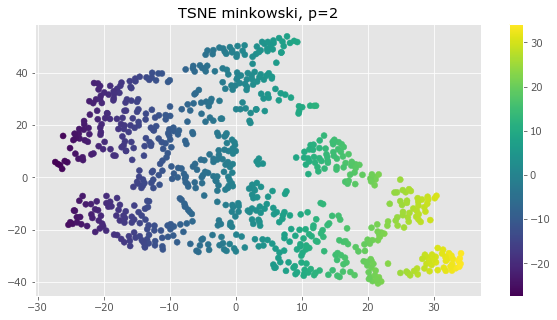

In [67]:
draw_minkowski(imgs_train, 2)
plt.title("TSNE minkowski, p=2")

Text(0.5,1,'TSNE minkowski, p=1')

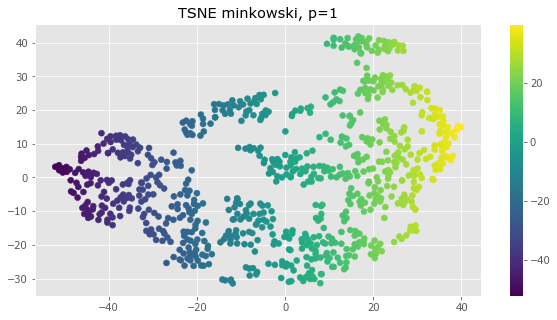

In [69]:
draw_minkowski(imgs_train, 1)
plt.title("TSNE minkowski, p=1")

Text(0.5,1,'TSNE minkowski, p=np.infty')

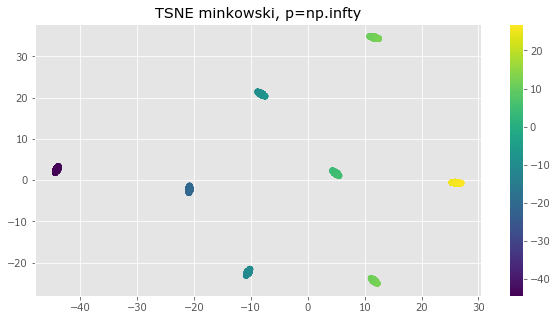

In [70]:
draw_minkowski(imgs_train, np.infty)
plt.title("TSNE minkowski, p=np.infty")

Ответьте на вопросы:
* Хорошо ли разделяются классы на визуализации? 
* Можно ли выделить группы похожих классов по визуализации? Если да, то похожи ли они на те, которые вы выделяли в предыдущей секции вопросов?
* С каким параметром расстояния Минковского визуализация получается лучше всего? Предположите, почему (для этого надо разобраться, как работает расстояние с p=1 и p=бесконечность применительно к картинкам)

Ответ: 
* Классы разделяются не всегда хорошо. М T-SNE с эвклидовым расстоянием разделяет достаточно плохо из-за большого числа признаков. Расстояние Минковского работает гораздо лучше.
* По этому типу визуализации сложно определить группы похожих классов.
* Лучше всего визуализация получается с параметром p=бесконечность. Видимо, чем больше p, тем метрика слабее штрафует небольшие различия между векторами и сильнее штрафует большие различия, вследствие чего классы группируются более явно.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (0.5 балла код + 0.5 балла выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

In [71]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=9, random_state=12345)
clusters = k_means.fit_transform(imgs_train)

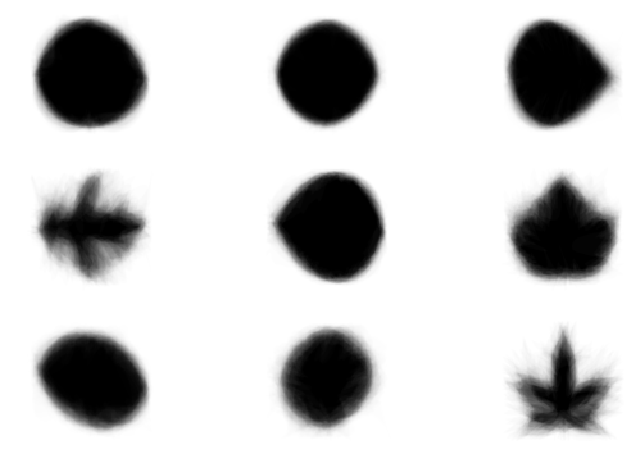

In [72]:
centers = k_means.cluster_centers_
for i in range(1, 10): 
    plt.subplot(3, 3, i)
    center = np.reshape(centers[i-1],((100,100)))
    plt.imshow(center, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

In [73]:
k_means_1 = KMeans(n_clusters=25,random_state=12345)
clusters_1 = k_means_1.fit_transform(imgs_train)

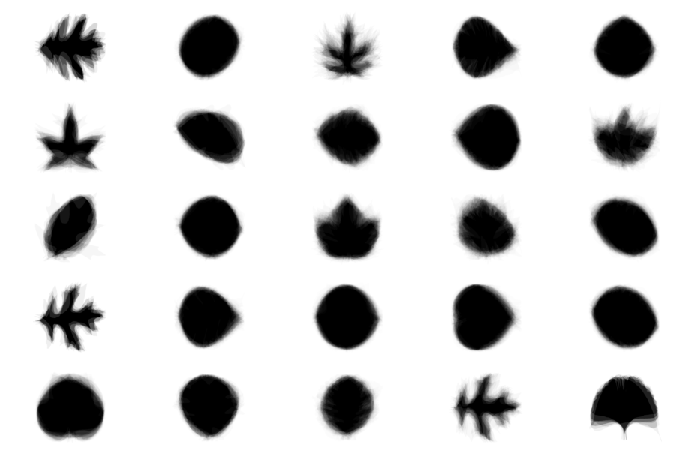

In [74]:
centers_1 = k_means_1.cluster_centers_
for i in range(1, 26): 
    plt.subplot(5, 5, i)
    center_1 = np.reshape(centers_1[i-1],((100,100)))
    plt.imshow(center_1, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

In [75]:
k_means_2 = KMeans(n_clusters=100, random_state=12345)
clusters_2 = k_means_2.fit_transform(imgs_train)

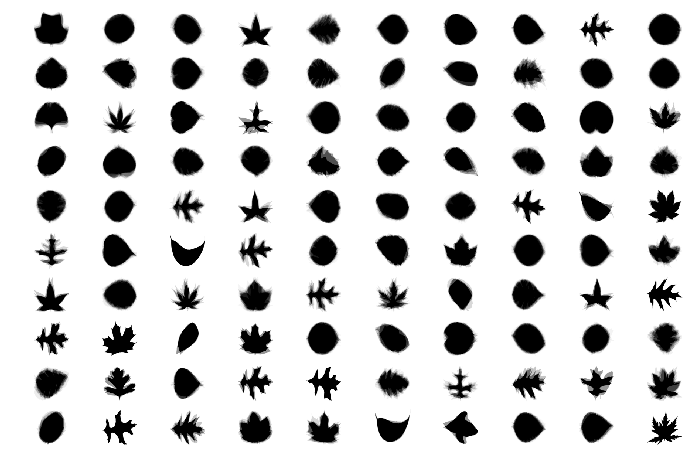

In [76]:
centers_2 = k_means_2.cluster_centers_
for i in range(1, 101): 
    plt.subplot(10, 10, i)
    center_2 = np.reshape(centers_2[i-1],((100,100)))
    plt.imshow(center_2, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

Ответ: 
* Да, похожи. Чем больше кластеров, тем лучше изображение
* Отличие изображений центров кластеров от картинок листьев состоит в размытости полученных изображений, которая происходит из-за того, что формы листьев разные, и при кластеризации происходит наложение одних пикселей на другие, из-за чего изображение зашумляется и становится размытым
* Среди кластеров есть очень похожие и повторяющиеся листья
* Лучше всего подходит 100 кластеров, т.к. соответствует числу классов 


__Бонус 1 (1 доп. балл)__

Повторите кластеризацию с другими метриками, рассмотренными в разделе Визуализация. Отличаются ли результаты? В этом задании нужно использовать любой другой метод кластеризации, который поддерживает использование различных метрик.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (0.5 балла код + 0.5 балла выводы)
Настройте 3 классификатора и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется параметр feature\_log\_prob_ - это оцененный по данным логарифм вероятности $P(x_i|y)$. Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [82]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import accuracy_score
nc=NearestCentroid()
nc.fit(imgs_train, y_train)
nc_pred=nc.predict(imgs_test)
print("Accuracy with Nearest Centroid =", accuracy_score(nc_pred,y_test))

Accuracy with Nearest Centroid = 0.5505050505050505


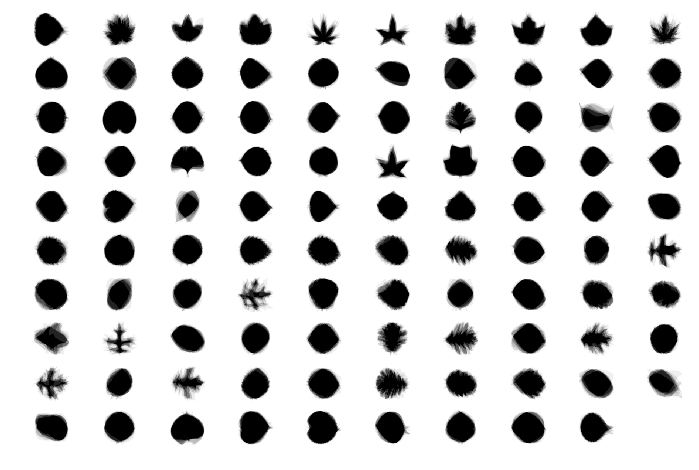

In [83]:
centroids = nc.centroids_
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    centroid = np.reshape(centroids[i-1],((100,100)))
    plt.imshow(centroid, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

In [84]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(imgs_train, y_train)
nb_pred=nb.predict(imgs_test)
print("Accuracy with Naive Bayes =", accuracy_score(nb_pred,y_test))

Accuracy with Naive Bayes = 0.5050505050505051


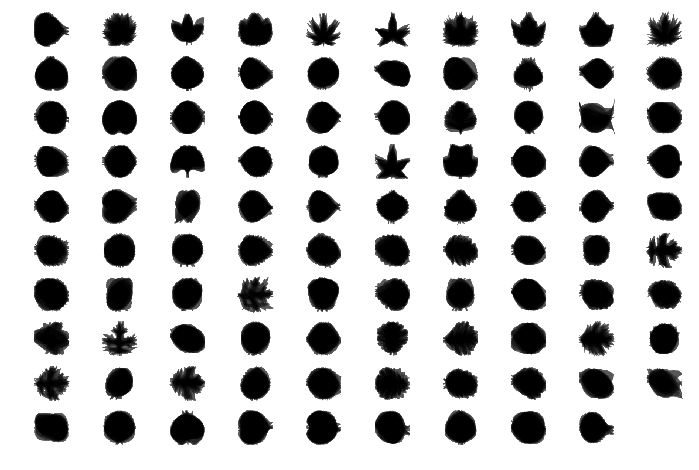

In [85]:
log_probs = nb.feature_log_prob_
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    log_prob = np.reshape(log_probs[i-1],((100,100)))
    plt.imshow(log_prob, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=12345)
lr.fit(imgs_train, y_train)
lr_pred=lr.predict(imgs_test)
print("Accuracy with Logistic Regression =", accuracy_score(lr_pred,y_test))

Accuracy with Logistic Regression = 0.5656565656565656


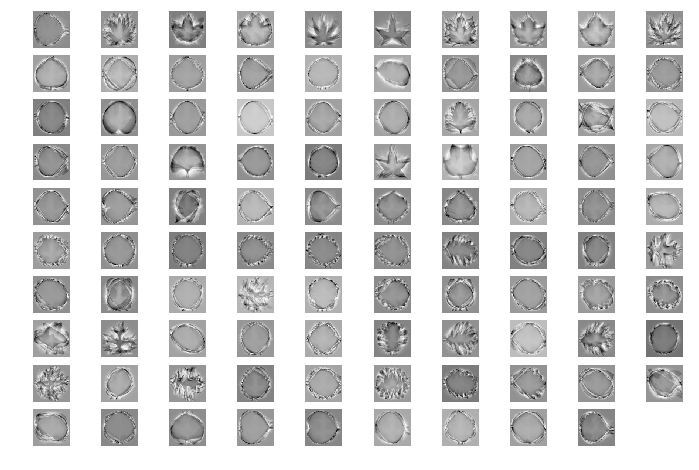

In [87]:
coefs=lr.coef_
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    coef = np.reshape(coefs[i-1],((100,100)))
    plt.imshow(coef, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

Ответ: 
* Довольно сложно сказать, лучше работает линейная или логистическая регрессия. Логистическая регрессия хорошо работает, потому что логистическая функция потерь корректно влияет на вероятность класса
* Центры кластеров и визуализированные вероятности похожи на исходные изображения. Контуры на визуализации весов похожи на листья, но все же изображения далеки от исходных из-за размытости 
* Изображения получаются в серых тонах, потому что константные признаки обозначаются серым цветом. Веса линейного классификатора обозначают важность каждого признака

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на наших данных. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=12345)
rfc.fit(imgs_train, y_train)
rfc_pred = rfc.predict(imgs_test)
print('Accuracy with Random Forest =', accuracy_score(rfc_pred,y_test))

Accuracy with Random Forest = 0.40404040404040403


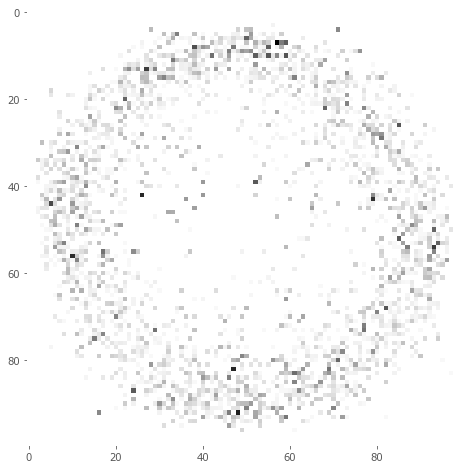

In [89]:
feat_imps = rfc.feature_importances_
feat_imp = np.reshape(feat_imps,((100,100)))
plt.imshow(feat_imp, cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

Ответ: 
* Картинка отдалено напоминает овальный лист, можно сказать, что не похожа на изображение листа 
*  FR определил как неважные центр изображения и края изображения, потому что на всех картинках интенсивность пикселей по краям изображения одинакова, так же и с центром изображения, эти части изображения у всех картинок в целом одинаковые, и они не помогают в определении класса листа. Очертания листа помогают в определении класса

### Другой наивный байесовский классификатор (0.25 балла код + 0.25 балла выводы)
* В разделе Простая визуализаия вы придумали порог, по которому можно бинаризовать картинки. Выполните эту бинаризацию и настройте BernoulliNB, выведите качество на контроле.
* Визуализируйте вероятности.

In [90]:
from sklearn.naive_bayes import BernoulliNB
mean = np.mean (imgs_train)
bnb=BernoulliNB(binarize = mean)
bnb.fit(imgs_train, y_train)
bnb_pred = bnb.predict(imgs_test)
print('Accuracy with binarizing and Bernoulli NB =', accuracy_score(bnb_pred,y_test))

Accuracy with binarizing and Bernoulli NB = 0.4898989898989899


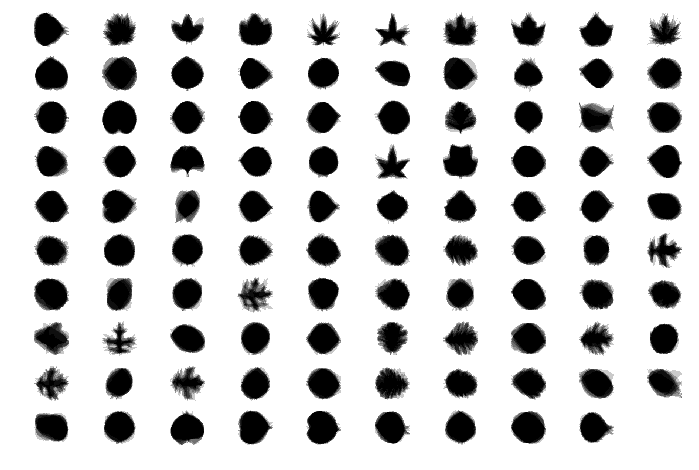

In [91]:
features_probs=bnb.feature_log_prob_
for i in range(1, 100): 
    plt.subplot(10, 10, i)
    features_prob = np.reshape(features_probs[i-1],((100,100)))
    plt.imshow(features_prob, cmap='Greys')
    plt.grid(None)
    plt.axis("off")

Ответьте на вопросы:
* Улучшилось на качество классификации по сравнению с MultinomialNB? Как вы думаете, почему?
* Похожи ли картинки на листья?

Ответ: 
1. Нет, не улучшилось. Вероятно, это произошло потому, что исходные картинки и так очень напоминают бинаризованные.
2. Картинки похожи на листья, но немного размытые 

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обуении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд. После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [92]:
num_components = 2**np.arange(10)

In [93]:
from sklearn.decomposition import PCA

accuracy_train = []
accuracy_test = []

for param in num_components:
    pca = PCA(param, random_state = 12345)
    
    train_components = pca.fit_transform(imgs_train)
    test_components = pca.transform(imgs_test)
    
    rf = RandomForestClassifier(random_state = 12345)
    rf.fit(train_components, y_train)

    accuracy_train.append(accuracy_score(y_train, rf.predict(train_components)))
    accuracy_test.append(accuracy_score(y_test, rf.predict(test_components)))
    
    print('Accuracy_train при параметре ', param, ' - ', accuracy_score(y_train, rf.predict(train_components)))
    print('Accuracy_test при параметре ', param, ' - ', accuracy_score(y_test, rf.predict(test_components)))

Accuracy_train при параметре  1  -  0.9154040404040404
Accuracy_test при параметре  1  -  0.0707070707070707
Accuracy_train при параметре  2  -  0.9709595959595959
Accuracy_test при параметре  2  -  0.17676767676767677
Accuracy_train при параметре  4  -  0.98989898989899
Accuracy_test при параметре  4  -  0.29292929292929293
Accuracy_train при параметре  8  -  0.9936868686868687
Accuracy_test при параметре  8  -  0.4595959595959596
Accuracy_train при параметре  16  -  0.9974747474747475
Accuracy_test при параметре  16  -  0.4494949494949495
Accuracy_train при параметре  32  -  0.9974747474747475
Accuracy_test при параметре  32  -  0.40404040404040403
Accuracy_train при параметре  64  -  0.9987373737373737
Accuracy_test при параметре  64  -  0.3434343434343434
Accuracy_train при параметре  128  -  0.9987373737373737
Accuracy_test при параметре  128  -  0.3434343434343434
Accuracy_train при параметре  256  -  0.9987373737373737
Accuracy_test при параметре  256  -  0.26262626262626265
Acc

In [94]:
rf = RandomForestClassifier(random_state = 12345)
rf.fit(imgs_train, y_train)

print('Accuracy_train:', accuracy_score(y_train, rf.predict(imgs_train)))
print('Accuracy_test:', accuracy_score(y_test, rf.predict(imgs_test)))

Accuracy_train: 0.9987373737373737
Accuracy_test: 0.40404040404040403


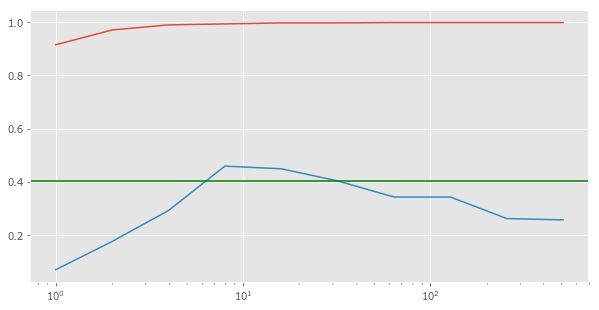

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(num_components, accuracy_train)
plt.plot(num_components, accuracy_test)
plt.axhline(y=accuracy_score(y_test, rf.predict(imgs_test)), xmin=0, xmax=1, hold=None, c = 'green')
plt.xscale("log")

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

Ответ: 
* Скорее всего, лес переобучается, но не при каждом числе компонент. Судя по разнице между почти идеальным качеством на обучении и сравнительно низким качеством на тесте, случайный лес переобучается при использовании любого числа компонент, кроме 8, 16, 32.
*  Лучшее качество на контроле достигается при параметре 8, при 16 и 32 не сильно отличается 

### Отбор признаков (0.5 балла код + 0.5 балла выводы)
* Обучите SelectKBest на обучающих данных. Он ранжирует признаки согласно статистическому тесту, оценивающему согласованность каждого признака с целевой переменной.
* Визуализруйте scores\_ как картинку 100x100.
* Оставьте 100 самых важных признаков и обучите на них логистическую регрессию. Выведите качество на контрольной выборке.

In [99]:
from sklearn.feature_selection import SelectKBest

In [100]:
skb = SelectKBest(k='all')
skb.fit_transform(imgs_train, y_train)
scores = skb.scores_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ... 9997 9998 9999] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(-0.5, 99.5, 99.5, -0.5)

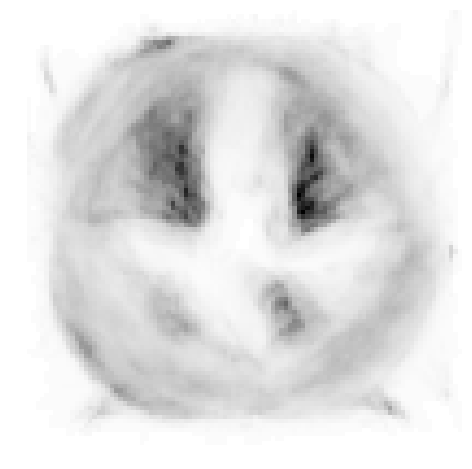

In [101]:
scores = np.reshape(scores,((100,100)))
plt.imshow(scores, cmap='Greys')
plt.grid(None)
plt.axis("off")

In [102]:
skb_100 = SelectKBest(k=100)
imgs_train_100 = skb_100.fit_transform(imgs_train,y_train)
imgs_test_100 = skb_100.transform (imgs_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [   0    1    2 ... 9997 9998 9999] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [104]:
lr.fit (imgs_train_100, y_train)
lr_pred_100 = lr.predict (imgs_test_100)
print ("Accuracy:", accuracy_score(lr_pred_100,y_test))

Accuracy: 0.04040404040404041


Ответьте на вопрос:
* Разумно ли предложенное алгоритмом ранжирование? Верно ли, что признаки, котореы он указал как неважные, действительно не помогают классифицировать листья?
* Сильно ли изменилось качество решения задачи после отбора признаков?

Ответ: 
* Данный алгоритм бесполезен. Наоборот, признаки указанные как неважные этим алгоритмом помогают классифицировать листья 
* Качество классификации упало, стало близким к нулю, т.е. классификатор практически не может отличить листья разных классов. 

## 5. Hyperparameters tuning
Наконец, пришло время настроить гиперпараметры модели и получить итоговое качество. В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

### Настройка гиперпараметров случайного леса (2 балла)
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

rf = RandomForestClassifier(random_state = 12345)

rf_grid = GridSearchCV(rf, { 'max_depth': [3, 5, 10, None], 'n_estimators': [50, 100, 150, 300], 
                            'max_features': ['log2', 'sqrt', 30]}, scoring = make_scorer(accuracy_score, 
                            greater_is_better = True), cv = 4)

rf_grid.fit(X_train, y_train)

print('Самый удачный параметр max_depth:', rf_grid.best_params_.get('max_depth'))
print('Самый удачный параметр n_estimators:', rf_grid.best_params_.get('n_estimators'))
print('Самый удачный параметр max_features:', rf_grid.best_params_.get('max_features'))
print('Accuracy =', rf_grid.best_score_)

Самый удачный параметр max_depth: None
Самый удачный параметр n_estimators: 300
Самый удачный параметр max_features: 30
Accuracy = 0.9785353535353535


In [107]:
rf = RandomForestClassifier(max_depth = None, n_estimators = 300, max_features = 30, random_state = 12345)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9949494949494949


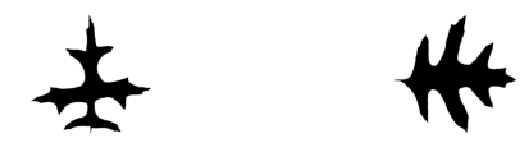

In [108]:
discrepancies = []
pics = []

for i in range (len(y_test)):
    if y_test[i] != y_pred[i]:
        discrepancies.append(i)

for i in discrepancies:
    j = 0

    while y_test[j] != y_pred[i]:
        j+=1

    pics.append(imgs_test[i])
    pics.append(imgs_test[j])

for i in range(1, len(discrepancies)+2):
    plt.subplot(3, 2, i)
    pic = np.reshape(pics[i-1], (100, 100))
    plt.imshow(pic, cmap='Greys')
    plt.axis("off")

Слева - истинное изображение листа, справа - пример листа из предсказанного класса